In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
from neural_map import NeuralMap, _plot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_excel('datasets/MixturePanCancer.xlsx')
l_columns = ['Type', 'Sbj']
col = 'Type'

In [4]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df.drop(l_columns, axis=1).values)

data.shape

(10452, 22)

In [5]:
som = NeuralMap(z=data.shape[1], x=16, y=16, metric='correlation')

seed:  923




Epoch:  1  of  30     Learning rate:  1.0     Radius:  6.92820323027551


Epoch:  2  of  30     Learning rate:  0.9658620689655173     Radius:  6.4808758316632495


Epoch:  3  of  30     Learning rate:  0.9317241379310345     Radius:  6.062430640298431


Epoch:  4  of  30     Learning rate:  0.8975862068965518     Radius:  5.671002843298875


Epoch:  5  of  30     Learning rate:  0.863448275862069     Radius:  5.304848031567878


Epoch:  6  of  30     Learning rate:  0.8293103448275863     Radius:  4.962334425785522


Epoch:  7  of  30     Learning rate:  0.7951724137931034     Radius:  4.641935604337782


Epoch:  8  of  30     Learning rate:  0.7610344827586207     Radius:  4.342223700775237


Epoch:  9  of  30     Learning rate:  0.7268965517241379     Radius:  4.0618630404856795


Epoch:  10  of  30     Learning rate:  0.6927586206896552     Radius:  3.7996041882222635


Epoch:  11  of  30     Learning rate:  0.6586206896551724     Radius:  3.5542783799598343


Epoch:  12  of  30 

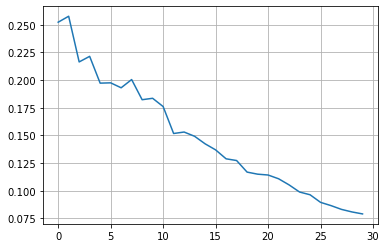



Topographic error per epoch
first epoch:  0.223115193264447
last epoch:  0.10658247225411405


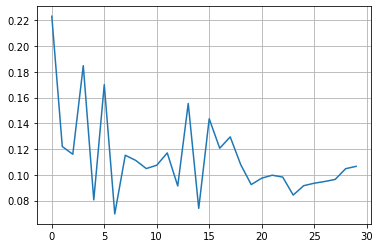

In [6]:
som.train(data=data, radius_decay_function='exponential', verbosity=True, eval_data=data, num_epochs=30)

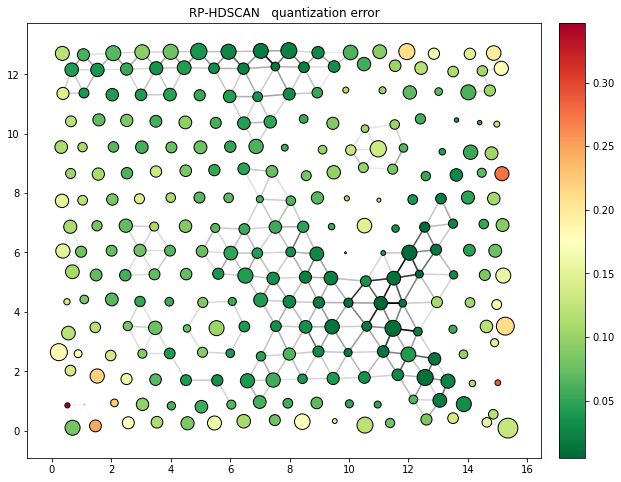

In [7]:
som.plot_analysis(data)

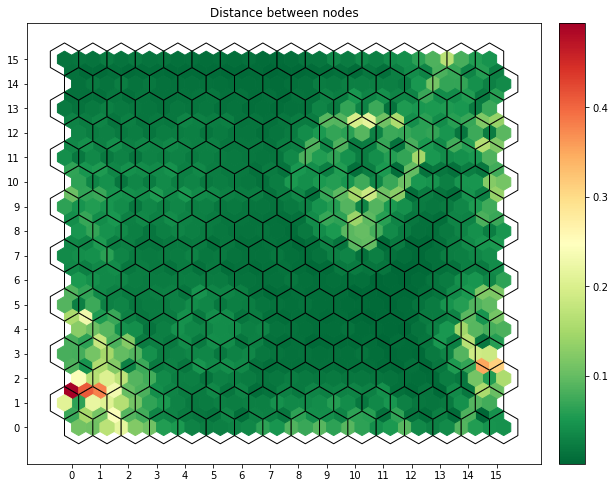

In [8]:
som.plot_u_matrix(detailed=True, borders=True)

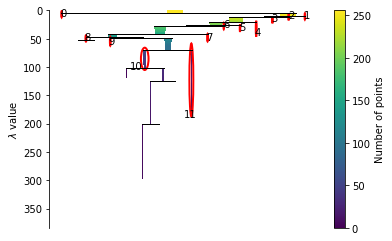

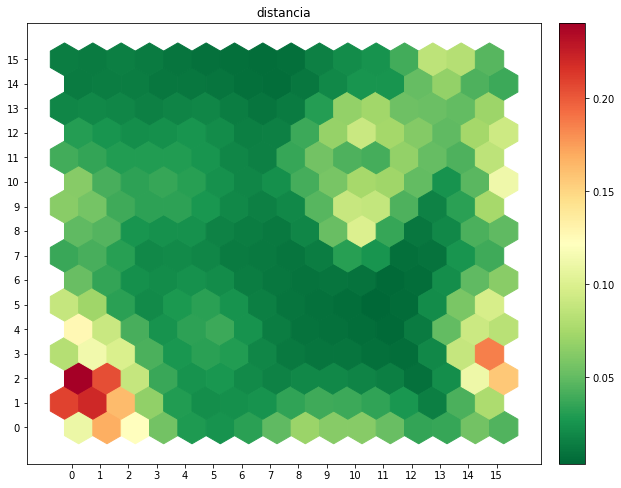

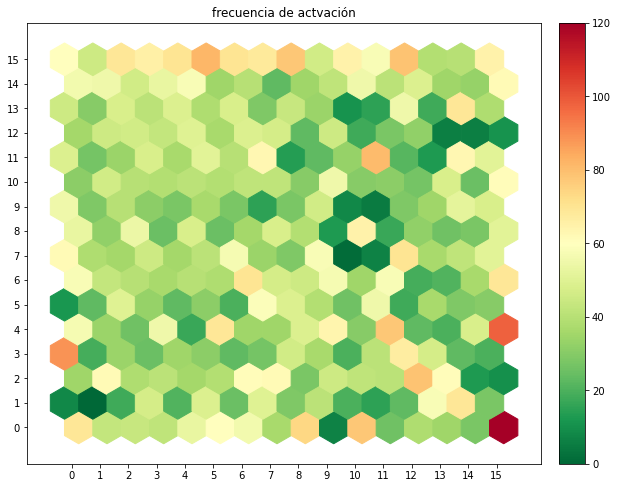

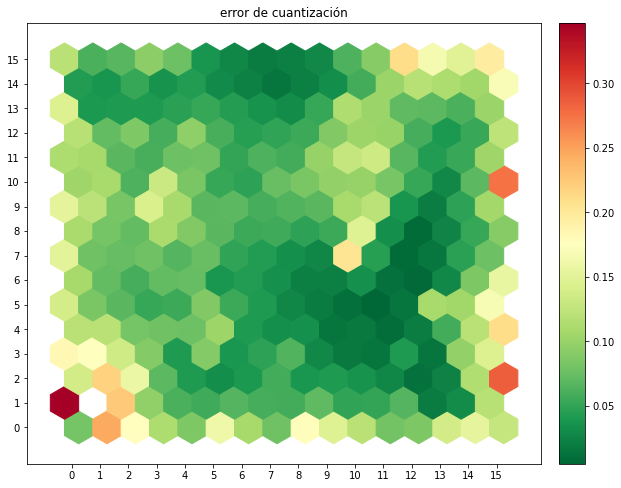

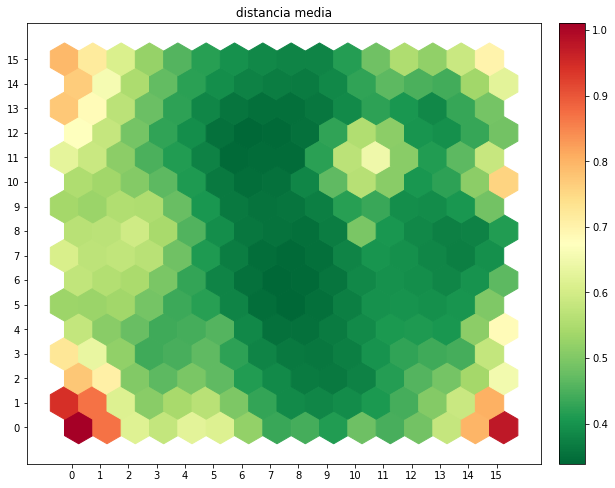

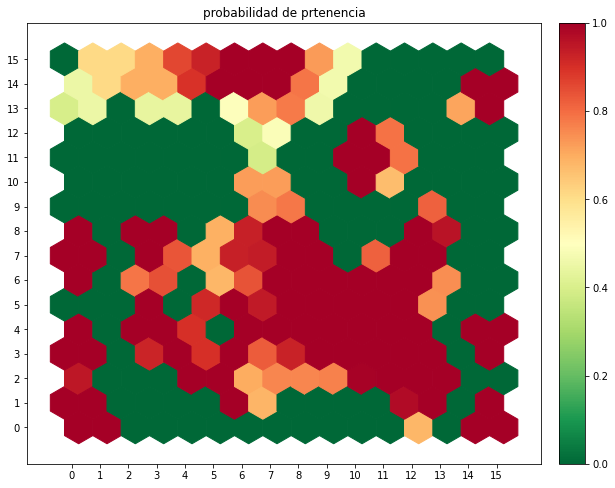

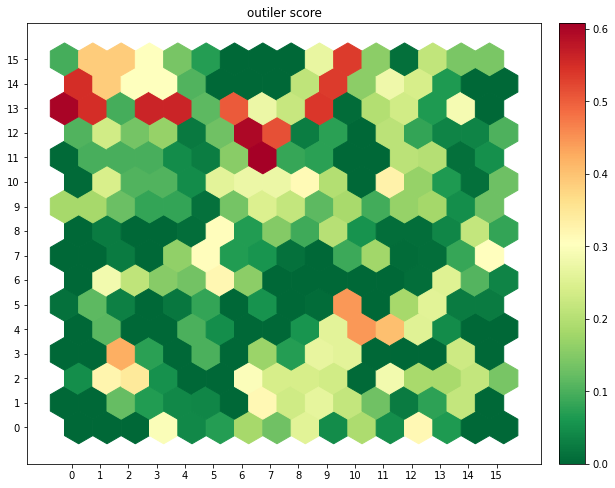

In [9]:
actfreq, q, mean_distance = som.analyse(data)
umatrix, distance_matrix = som.unified_distance_matrix()
labels, probabilities, outlier_socer = som.hdbscan(min_cluster_size=3)

_plot.tiles(som.cart_coord, som.hexagonal, umatrix[..., -1], title='distancia')
_plot.tiles(som.cart_coord, som.hexagonal, actfreq, title='frecuencia de actvación')
_plot.tiles(som.cart_coord, som.hexagonal, q, title='error de cuantización')
_plot.tiles(som.cart_coord, som.hexagonal, mean_distance, title='distancia media')
_plot.tiles(som.cart_coord, som.hexagonal, probabilities, title = 'probabilidad de prtenencia')
_plot.tiles(som.cart_coord, som.hexagonal, outlier_socer, title = 'outiler score')

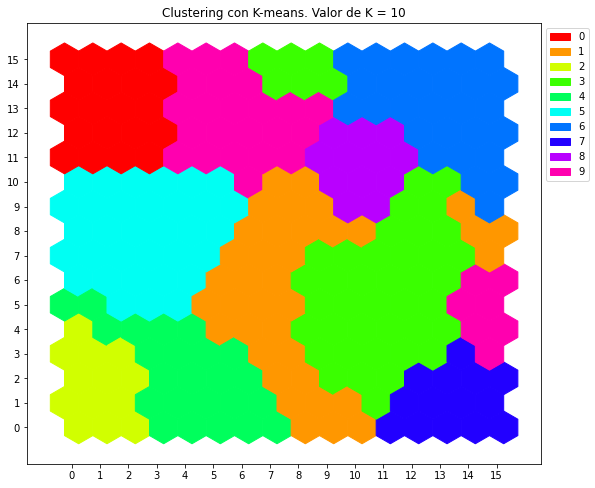

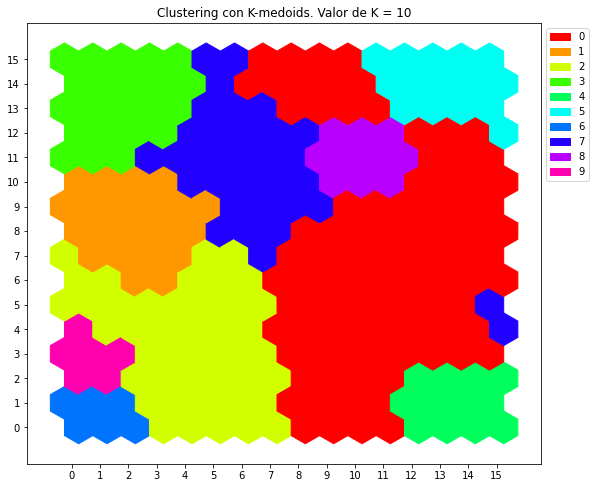

In [10]:
clusters = 10

labels, centers = som.k_means(clusters)
_plot.tiles(som.cart_coord, som.hexagonal, labels, norm=False, title='Clustering con K-means. Valor de K = ' + str(clusters), labels=list(range(clusters)), cmap=plt.cm.get_cmap('hsv', clusters + 1))

labels, centers = som.k_medoids(clusters)
_plot.tiles(som.cart_coord, som.hexagonal, labels, norm=False, title='Clustering con K-medoids. Valor de K = ' + str(clusters), labels=list(range(clusters)), cmap=plt.cm.get_cmap('hsv', clusters + 1))


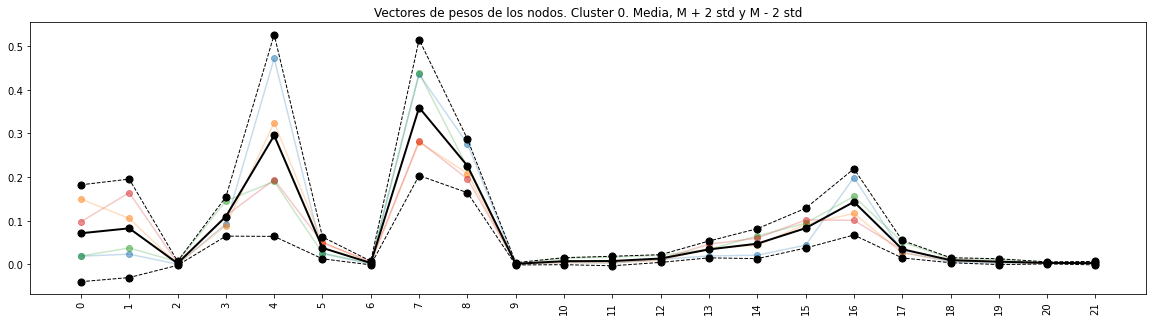

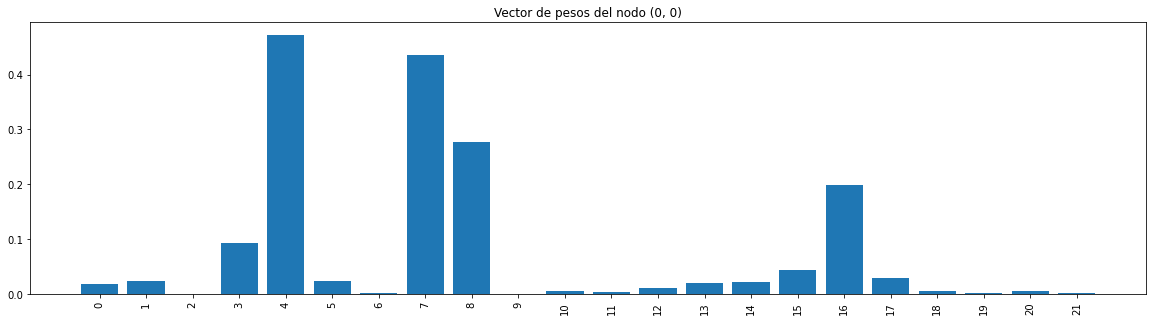

In [11]:
som.plot_set_weight_vectors(cluster=0)
som.plot_node_weight_vector(node_index=(0, 0))